In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
img=cv2.imread("Untitled.png")

In [37]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HSV_mask = cv2.inRange(img_HSV, (0, 58, 0), (50,173,255)) 


In [38]:
HSV_mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

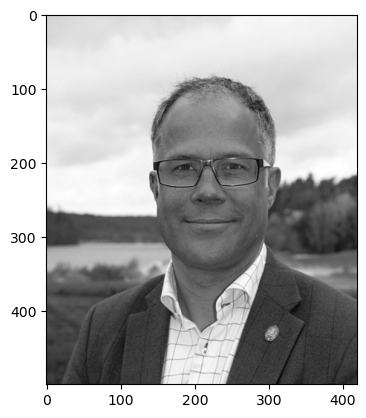

In [39]:
B = img[...,0]
G = img[...,1]
R = img[...,2]
plt.imshow(B,cmap = 'gray')

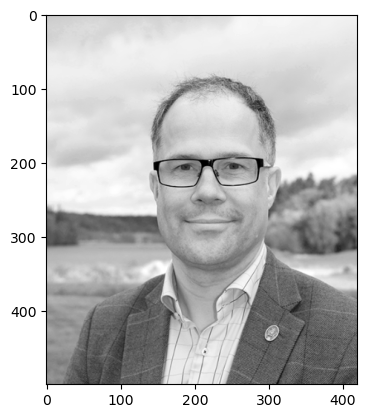

In [40]:
plt.imshow(R,cmap = 'gray')

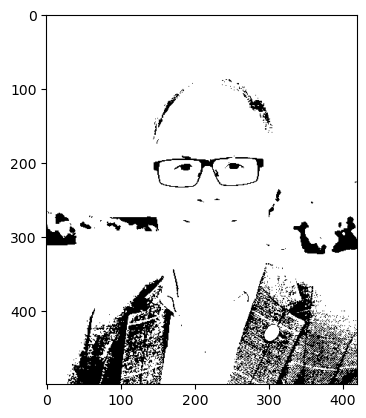

In [41]:
mask1 = R > 95

plt.imshow(mask1, cmap='gray')


In [42]:
mask1 = np.where(mask1==True,1,0)

In [43]:
mask1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 1, 1]])

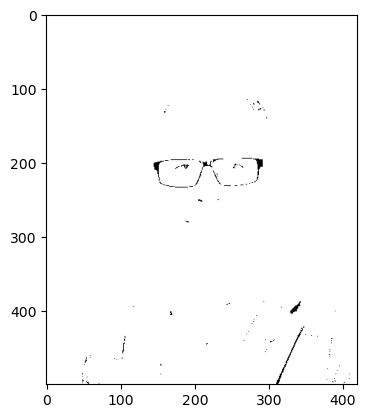

In [44]:
mask2 = G > 40
plt.imshow(mask2, cmap='gray')


In [45]:
mask2 = np.where(mask2==True,1,0)

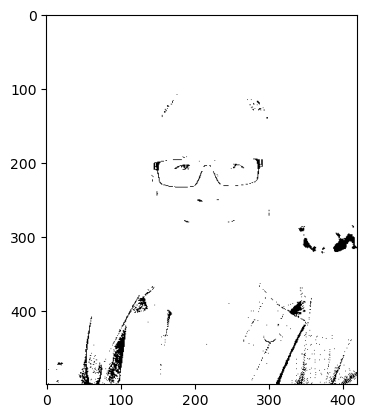

In [46]:
mask3 = B > 40
plt.imshow(mask3, cmap='gray')

In [47]:
mask3 = np.where(mask3==True,1,0)

In [48]:
res1 = cv2.bitwise_and(mask1, mask2)

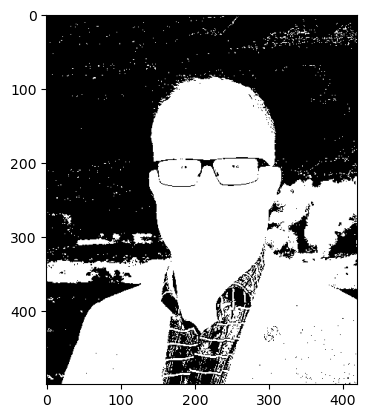

In [49]:
mask4 = R > G
plt.imshow(mask4, cmap='gray')

In [50]:
mask4 = np.where(mask4==True,1,0)

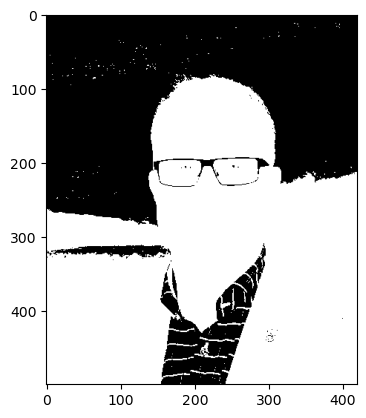

In [51]:
mask5 = R > B
plt.imshow(mask5, cmap='gray')

In [52]:
mask5 = np.where(mask5==True,1,0)

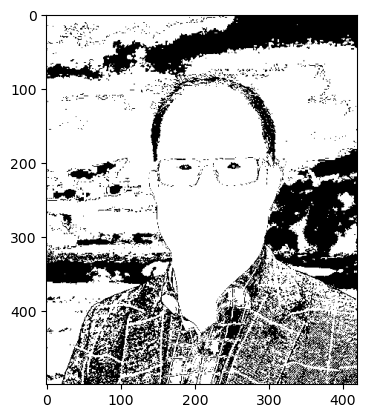

In [53]:
mask6 = np.abs(R-G) > 15
plt.imshow(mask6, cmap='gray')

In [54]:
mask6 = np.where(mask6==True,1,0)

In [55]:
res1 = cv2.bitwise_and(mask1, mask2, mask3)

In [56]:
res2 = cv2.bitwise_and(mask4, mask5, mask6)

In [57]:
res = cv2.bitwise_and(res1, res2)

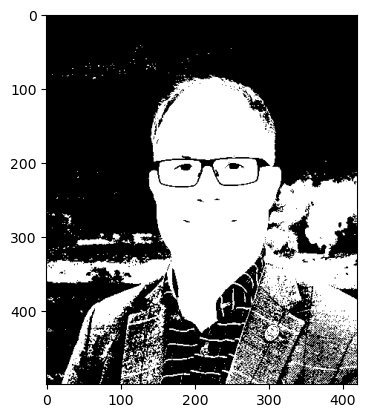

In [58]:
plt.imshow(res, cmap='gray')

In [59]:
res_int8 = res.astype(np.uint8)

In [60]:
new = cv2.bitwise_and(img, img, mask = res_int8)

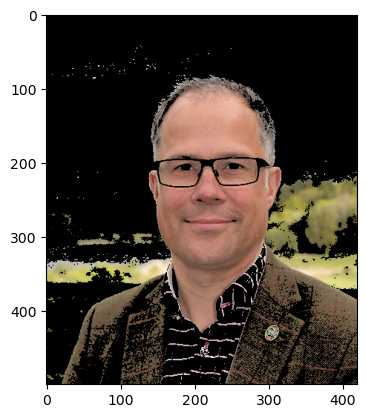

In [61]:
plt.imshow(new[...,::-1])

In [70]:
lower = np.array([0,58,50])
upper = np.array([50,173,255])

In [71]:
hsv_image = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [72]:
mask7 = cv2.inRange(hsv_image, lower, upper) 

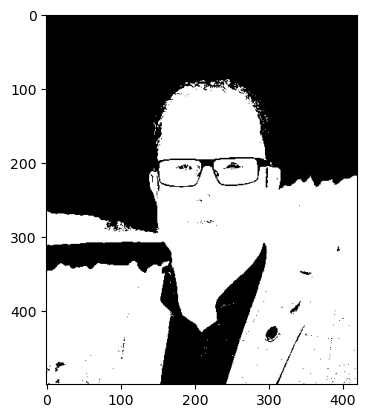

In [73]:
plt.imshow(mask7, cmap='gray')

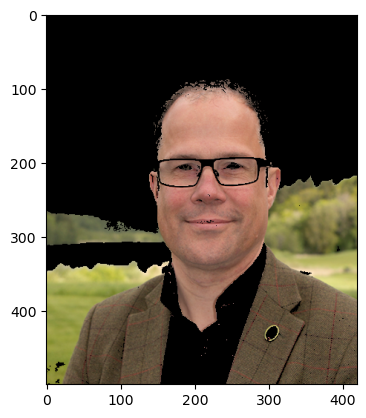

In [74]:
final = cv2.bitwise_and(img, img, mask = mask7)
plt.imshow(final[...,::-1])

In [75]:
final_res = cv2.bitwise_and(res_int8,mask7)

In [76]:
pic = cv2.bitwise_and(img, img, mask = final_res)

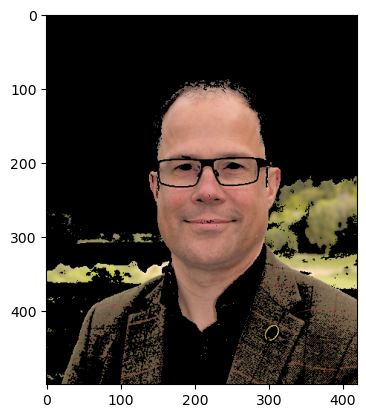

In [77]:
plt.imshow(pic[...,::-1])